In [692]:
import pandas as pd
import numpy  as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

1. Загрузите и прочитайте в pandas приложенный датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится (рис.1), необходимо его обработать.

In [693]:
dates_list = ["dateCreated", "lastSeen", "dateCrawled"]
cars = pd.read_csv('cars_sampled.csv', parse_dates=dates_list)
print(type(cars))
cars.head()

<class 'pandas.core.frame.DataFrame'>


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00


2. Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [694]:
def descr(dataset: pd.DataFrame)-> dict:
  dataframe_descr = {}
  unique_data = {}
  print(f'\033[33mТипы данных датасета: {dataset.dtypes}\n')
  dataframe_descr['Типы данных датасета'] = dataset.dtypes

  print(f'\033[35mКол-во пустых значений: {dataset.isna().sum()}\n')
  dataframe_descr['Кол-во пустых значений'] = dataset.isna().sum()

  print(f'\033[36mКол-во признаков в датасете: {dataset.shape[0]}\n')
  dataframe_descr['Кол-во признаков в датасете'] = dataset.shape[0]

  print(f'\033[33mКол-во атрибутов в датасете: {dataset.shape[1]}\n')
  dataframe_descr['Кол-во атрибутов в датасете'] = dataset.shape[1]

  print(f'\033[35mКол-во уникальных значений: {dataset.nunique()}\n')
  dataframe_descr['Кол-во уникальных значений'] = dataset.nunique()

  print(cars.info())
  print('\033[0m')
  for col in dataset.columns:
    print(f'\nУникальные занчений в {col}:\n {dataset[col].unique()}')
    unique_data[col] = dataset[col].unique()
  dataframe_descr['Уникальные для атрибутов'] = unique_data
  return(dataframe_descr)

In [695]:
descr(cars)
res = descr(cars)

Типы данных датасета: dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

Кол-во пустых значений: dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration   

In [696]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


3. Поработайте с типами переменных. Все числовые значения переведите в формат int.

4. Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

int64


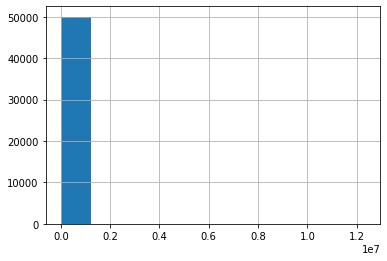

In [697]:
#До удаления выбросов
print(cars['price'].dtypes)
cars['price'].hist();

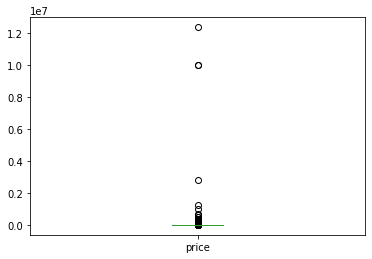

In [698]:
#До удаления выбросов 
cars['price'].plot.box();

In [699]:
#Удаление выбросов
for i in ['price']:
    q75,q25 = np.percentile(cars.loc[:,i],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    cars.loc[cars[i] < min,i] = np.nan
    cars.loc[cars[i] > max,i] = np.nan

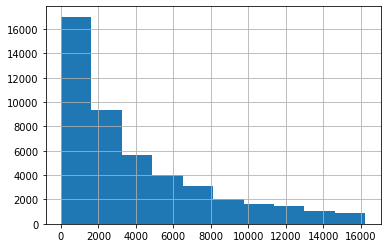

In [700]:
#Ну собственно после удаления выбросов
cars['price'].hist();

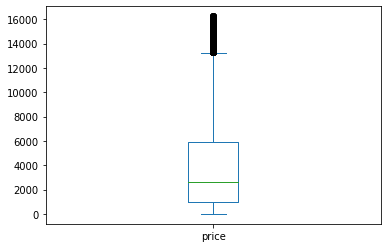

In [701]:
cars['price'].plot.box();

In [702]:
cars['price'].isna().sum()

3757

5. Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

In [703]:
cols = cars.columns
for col_name in cols:
  for i in [col_name]:
    if cars[i].dtypes == 'int64' and i != 'price':
      q75,q25 = np.percentile(cars.loc[:,i],[75,25])
      intr_qr = q75-q25

      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)

      cars.loc[cars[i] < min,i] = np.nan
      cars.loc[cars[i] > max,i] = np.nan
      

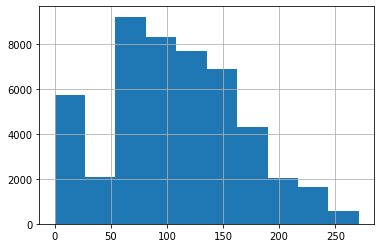

In [704]:
cars['powerPS'].hist();

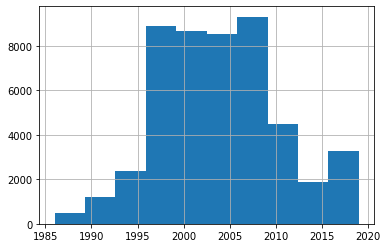

In [705]:
cars['yearOfRegistration'].hist();

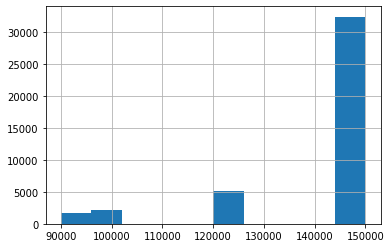

In [706]:
cars['kilometer'].hist();

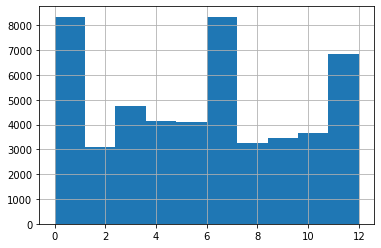

In [707]:
cars['monthOfRegistration'].hist();

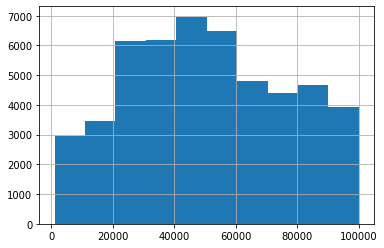

In [708]:
cars['postalCode'].hist();

In [709]:
cars.corr()# Выводим матрицу (не через heatmap)

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
price,1.000000,0.450963,0.454926,-0.216615,0.116131,0.067858
yearOfRegistration,0.450963,1.000000,0.140806,-0.176236,0.027200,0.031435
powerPS,0.454926,0.140806,1.000000,0.006665,0.145269,0.090624
kilometer,-0.216615,-0.176236,0.006665,1.000000,-0.023240,-0.018684
monthOfRegistration,0.116131,0.027200,0.145269,-0.023240,1.000000,0.019050
postalCode,0.067858,0.031435,0.090624,-0.018684,0.019050,1.000000


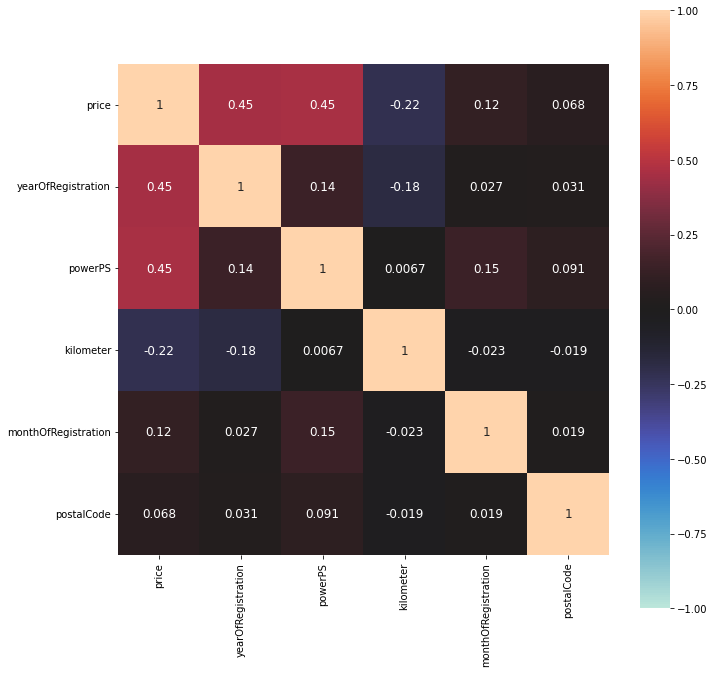

In [710]:
# Делаем то же самое, но через heatmap
ax = sns.heatmap(
    cars.corr(),
    annot=True,
    annot_kws={'size': 12},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(11, 11)

6. Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price. Сделайте выводы. Можно ли убрать значения с малой частотой? Повлияет ли это на дальнейшее исследование?

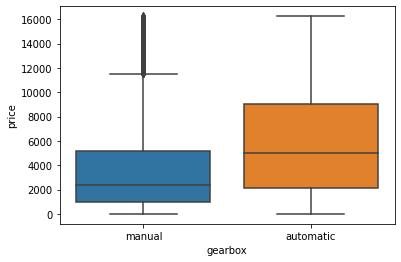

In [711]:
sns.boxplot(x=cars['gearbox'], y=cars['price']);

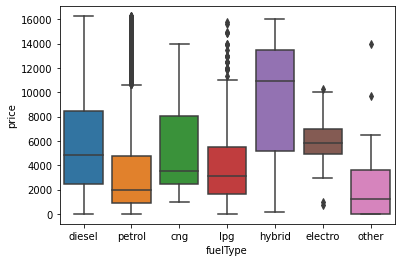

In [712]:
sns.boxplot(x=cars['fuelType'], y=cars['price']);

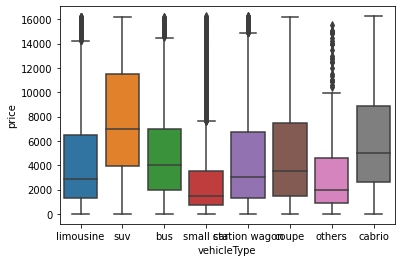

In [713]:
sns.boxplot(x=cars['vehicleType'], y=cars['price']);

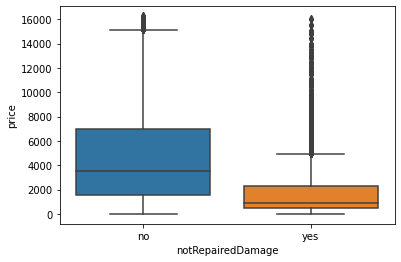

In [714]:
sns.boxplot(x=cars['notRepairedDamage'], y=cars['price']);

7. Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [715]:
cars.shape

(50001, 19)

In [716]:
nan_data = cars.isna().sum()
nan_cols = nan_data[nan_data > 0]
print(nan_cols)

price                 3757
vehicleType           5188
yearOfRegistration     959
gearbox               2824
powerPS               1505
model                 2758
kilometer             8671
fuelType              4503
notRepairedDamage     9716
dtype: int64


In [717]:
for i in range(len(nan_cols)):
  if nan_cols[i] > 6000:
    print(nan_cols.index[i])
    cars = cars.drop(nan_cols.index[i],axis=1)

nan_data = cars.isna().sum()
nan_cols = nan_data[nan_data > 0]

kilometer
notRepairedDamage


In [718]:
cars.head(20)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450.0,test,limousine,2003.0,manual,150.0,3er,3.0,diesel,bmw,2016-03-30,20257.0,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299.0,control,suv,2005.0,manual,163.0,xc_reihe,6.0,diesel,volvo,2016-07-03,88045.0,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200.0,test,bus,2003.0,manual,101.0,touran,11.0,diesel,volkswagen,2016-03-31,27449.0,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500.0,control,small car,2006.0,manual,86.0,ibiza,12.0,petrol,seat,2016-03-19,34537.0,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,NaN,test,suv,2008.0,automatic,185.0,xc_reihe,11.0,diesel,volvo,2016-03-16,55270.0,2016-01-04 23:18:00
5,2016-02-04 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988.0,test,limousine,1995.0,manual,90.0,passat,2.0,petrol,volkswagen,2016-02-04,26826.0,2016-02-04 12:51:00
6,2016-03-04 11:06:00,Opel_astra,private,offer,400.0,test,station wagon,1996.0,manual,0.0,astra,5.0,petrol,opel,2016-03-04,56422.0,2016-06-04 16:47:00
7,2016-03-24 15:52:00,Mercedes_Benz_CLK_Coupe_200,private,offer,1399.0,test,coupe,1997.0,manual,136.0,clk,11.0,petrol,mercedes_benz,2016-03-24,13353.0,2016-03-27 12:45:00
8,2016-03-28 14:40:00,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,4680.0,test,station wagon,2005.0,manual,122.0,vectra,12.0,petrol,opel,2016-03-28,28307.0,2016-06-04 18:19:00
9,2016-05-04 11:38:00,Skoda_Octavia_2.0_TDI_DSG_Elegance,private,offer,8340.0,test,limousine,2005.0,automatic,140.0,octavia,4.0,diesel,skoda,2016-05-04,16761.0,2016-05-04 11:38:00


In [719]:
for i in range(len(nan_cols)):
  if cars[nan_cols.index[i]].dtypes == 'float64':
    print(f'Числовые данные: {nan_cols.index[i]}')
    cars[nan_cols.index[i]][cars[nan_cols.index[i]].isnull()] = int(cars[nan_cols.index[i]].mean())
    cars[nan_cols.index[i]][cars[nan_cols.index[i]] == 0.0] = int(cars[nan_cols.index[i]].quantile(.25))
  if cars[nan_cols.index[i]].dtypes == 'O':
    print(f'Текстовые данные: {nan_cols.index[i]}')
    cars[nan_cols.index[i]][cars[nan_cols.index[i]].isnull()] = str(cars[nan_cols.index[i]].mode()[0])


Числовые данные: price
Текстовые данные: vehicleType
Числовые данные: yearOfRegistration
Текстовые данные: gearbox
Числовые данные: powerPS
Текстовые данные: model
Текстовые данные: fuelType


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [720]:
cars.head(20)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450.0,test,limousine,2003.0,manual,150.0,3er,3.0,diesel,bmw,2016-03-30,20257.0,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299.0,control,suv,2005.0,manual,163.0,xc_reihe,6.0,diesel,volvo,2016-07-03,88045.0,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200.0,test,bus,2003.0,manual,101.0,touran,11.0,diesel,volkswagen,2016-03-31,27449.0,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500.0,control,small car,2006.0,manual,86.0,ibiza,12.0,petrol,seat,2016-03-19,34537.0,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,3986.0,test,suv,2008.0,automatic,185.0,xc_reihe,11.0,diesel,volvo,2016-03-16,55270.0,2016-01-04 23:18:00
5,2016-02-04 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988.0,test,limousine,1995.0,manual,90.0,passat,2.0,petrol,volkswagen,2016-02-04,26826.0,2016-02-04 12:51:00
6,2016-03-04 11:06:00,Opel_astra,private,offer,400.0,test,station wagon,1996.0,manual,69.0,astra,5.0,petrol,opel,2016-03-04,56422.0,2016-06-04 16:47:00
7,2016-03-24 15:52:00,Mercedes_Benz_CLK_Coupe_200,private,offer,1399.0,test,coupe,1997.0,manual,136.0,clk,11.0,petrol,mercedes_benz,2016-03-24,13353.0,2016-03-27 12:45:00
8,2016-03-28 14:40:00,Vectra_C_Caravan_1_8_Edition_Facelift_m_AHK_In...,private,offer,4680.0,test,station wagon,2005.0,manual,122.0,vectra,12.0,petrol,opel,2016-03-28,28307.0,2016-06-04 18:19:00
9,2016-05-04 11:38:00,Skoda_Octavia_2.0_TDI_DSG_Elegance,private,offer,8340.0,test,limousine,2005.0,automatic,140.0,octavia,4.0,diesel,skoda,2016-05-04,16761.0,2016-05-04 11:38:00


In [721]:
cars.describe()

,price,yearOfRegistration,powerPS,monthOfRegistration,postalCode
count,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,4019.527149,2003.882982,113.269215,5.743725,50775.216696
std,3670.841013,6.384137,47.605777,3.711345,25743.701933
min,1.000000,1986.000000,1.000000,0.000000,1067.000000
25%,1150.000000,1999.000000,69.000000,3.000000,30559.000000
50%,2950.000000,2003.000000,105.000000,6.000000,49504.000000
75%,5500.000000,2008.000000,143.000000,9.000000,71404.000000
max,16250.000000,2019.000000,271.000000,12.000000,99998.000000


In [722]:
cars.shape

(50001, 17)

In [723]:
print(cars.isna().sum())

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
monthOfRegistration    0
fuelType               0
brand                  0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64


8. Сохраните полученный датасет и выведете его.


In [724]:
cars.to_csv('processed_cars_sample.csv')

In [725]:
processed_cars = pd.read_csv('processed_cars_sample.csv')
processed_cars.head(8)

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450.0,test,limousine,2003.0,manual,150.0,3er,3.0,diesel,bmw,2016-03-30 00:00:00,20257.0,2016-07-04 04:44:00
1,1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299.0,control,suv,2005.0,manual,163.0,xc_reihe,6.0,diesel,volvo,2016-07-03 00:00:00,88045.0,2016-03-26 13:17:00
2,2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200.0,test,bus,2003.0,manual,101.0,touran,11.0,diesel,volkswagen,2016-03-31 00:00:00,27449.0,2016-01-04 08:40:00
3,3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500.0,control,small car,2006.0,manual,86.0,ibiza,12.0,petrol,seat,2016-03-19 00:00:00,34537.0,2016-07-04 04:44:00
4,4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,3986.0,test,suv,2008.0,automatic,185.0,xc_reihe,11.0,diesel,volvo,2016-03-16 00:00:00,55270.0,2016-01-04 23:18:00
5,5,2016-02-04 12:51:00,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,988.0,test,limousine,1995.0,manual,90.0,passat,2.0,petrol,volkswagen,2016-02-04 00:00:00,26826.0,2016-02-04 12:51:00
6,6,2016-03-04 11:06:00,Opel_astra,private,offer,400.0,test,station wagon,1996.0,manual,69.0,astra,5.0,petrol,opel,2016-03-04 00:00:00,56422.0,2016-06-04 16:47:00
7,7,2016-03-24 15:52:00,Mercedes_Benz_CLK_Coupe_200,private,offer,1399.0,test,coupe,1997.0,manual,136.0,clk,11.0,petrol,mercedes_benz,2016-03-24 00:00:00,13353.0,2016-03-27 12:45:00
